In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')


pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [3]:
ss = pd.read_csv('../input/m5-forecasting-accuracy/sample_submission.csv')
ss

id  F1  F2  F3  F4  F5  F6  F7  F8  F9  F10  \
0      HOBBIES_1_001_CA_1_validation   0   0   0   0   0   0   0   0   0    0   
1      HOBBIES_1_002_CA_1_validation   0   0   0   0   0   0   0   0   0    0   
2      HOBBIES_1_003_CA_1_validation   0   0   0   0   0   0   0   0   0    0   
3      HOBBIES_1_004_CA_1_validation   0   0   0   0   0   0   0   0   0    0   
4      HOBBIES_1_005_CA_1_validation   0   0   0   0   0   0   0   0   0    0   
...                              ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
60975    FOODS_3_823_WI_3_evaluation   0   0   0   0   0   0   0   0   0    0   
60976    FOODS_3_824_WI_3_evaluation   0   0   0   0   0   0   0   0   0    0   
60977    FOODS_3_825_WI_3_evaluation   0   0   0   0   0   0   0   0   0    0   
60978    FOODS_3_826_WI_3_evaluation   0   0   0   0   0   0   0   0   0    0   
60979    FOODS_3_827_WI_3_evaluation   0   0   0   0   0   0   0   0   0    0   

       F11  F12  F13  F14  F15  F16  F17  F18  F19  F20  F21  F22  F23  F24  \
0        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4        0    0    0    0    0    0    0    0    0    0    0    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
60975    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
60976    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
60977    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
60978    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
60979    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

       F25  F26  F27  F28  
0        0    0    0    0  
1        0    0    0    0  
2        0    0    0    0  
3        0    0    0    0  
4        0    0    0    0  
...    ...  ...  ...  ...  
60975    0    0    0    0  
60976    0    0    0    0  
60977    0    0    0    0  
60978    0    0    0    0  
60979    0    0    0    0  

[60980 rows x 29 columns]

In [5]:
stv = pd.read_csv('../input/m5-forecasting-accuracy/sales_train_validation.csv')
stv.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  \
0       CA    0    0    0    0    0    0    0    0    0     0     0     0   
1       CA    0    0    0    0    0    0    0    0    0     0     0     0   
2       CA    0    0    0    0    0    0    0    0    0     0     0     0   
3       CA    0    0    0    0    0    0    0    0    0     0     0     0   
4       CA    0    0    0    0    0    0    0    0    0     0     0     0   

   d_13  d_14  d_15  d_16  d_17  d_18  d_19  ...  d_1889  d_1890  d_1891  \
0     0     0     0     0     0     0     0  ...       0       0       0   
1     0     0     0     0     0     0     0  ...       0       0       0   
2     0     0     0     0     0     0     0  ...       0       0       0   
3     0     0     0     0     0     0     0  ...       0       3       1   
4     0     0     0     0     0     0     0  ...       4       0       1   

   d_1892  d_1893  d_1894  d_1895  d_1896  d_1897  d_1898  d_1899  d_1900  \
0       1       0       4       2       3       0       1       2       0   
1       0       0       0       0       0       0       0       0       0   
2       1       0       0       0       1       0       0       0       0   
3       2       1       3       1       0       2       5       4       2   
4       4       0       1       0       1       0       1       1       2   

   d_1901  d_1902  d_1903  d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  \
0       0       0       1       1       3       0       1       1       1   
1       0       0       0       0       0       0       0       0       1   
2       0       1       2       2       1       2       1       1       1   
3       0       3       0       1       0       5       4       1       0   
4       0       1       1       2       1       1       0       1       1   

   d_1910  d_1911  d_1912  d_1913  
0       3       0       1       1  
1       0       0       0       0  
2       0       1       1       1  
3       1       3       7       2  
4       2       2       2       4  

[5 rows x 1919 columns]

In [4]:
cal = pd.read_csv('../input/m5-forecasting-accuracy/calendar.csv')
cal

date  wm_yr_wk    weekday  wday  month  year       d  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1   
1     2011-01-30     11101     Sunday     2      1  2011     d_2   
2     2011-01-31     11101     Monday     3      1  2011     d_3   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5   
...          ...       ...        ...   ...    ...   ...     ...   
1964  2016-06-15     11620  Wednesday     5      6  2016  d_1965   
1965  2016-06-16     11620   Thursday     6      6  2016  d_1966   
1966  2016-06-17     11620     Friday     7      6  2016  d_1967   
1967  2016-06-18     11621   Saturday     1      6  2016  d_1968   
1968  2016-06-19     11621     Sunday     2      6  2016  d_1969   

      event_name_1 event_type_1  event_name_2 event_type_2  snap_CA  snap_TX  \
0              NaN          NaN           NaN          NaN        0        0   
1              NaN          NaN           NaN          NaN        0        0   
2              NaN          NaN           NaN          NaN        0        0   
3              NaN          NaN           NaN          NaN        1        1   
4              NaN          NaN           NaN          NaN        1        0   
...            ...          ...           ...          ...      ...      ...   
1964           NaN          NaN           NaN          NaN        0        1   
1965           NaN          NaN           NaN          NaN        0        0   
1966           NaN          NaN           NaN          NaN        0        0   
1967           NaN          NaN           NaN          NaN        0        0   
1968  NBAFinalsEnd     Sporting  Father's day     Cultural        0        0   

      snap_WI  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
1964        1  
1965        0  
1966        0  
1967        0  
1968        0  

[1969 rows x 14 columns]

In [5]:
sellp = pd.read_csv('../input/m5-forecasting-accuracy/sell_prices.csv')
sellp

store_id        item_id  wm_yr_wk  sell_price
0           CA_1  HOBBIES_1_001     11325        9.58
1           CA_1  HOBBIES_1_001     11326        9.58
2           CA_1  HOBBIES_1_001     11327        8.26
3           CA_1  HOBBIES_1_001     11328        8.26
4           CA_1  HOBBIES_1_001     11329        8.26
...          ...            ...       ...         ...
6841116     WI_3    FOODS_3_827     11617        1.00
6841117     WI_3    FOODS_3_827     11618        1.00
6841118     WI_3    FOODS_3_827     11619        1.00
6841119     WI_3    FOODS_3_827     11620        1.00
6841120     WI_3    FOODS_3_827     11621        1.00

[6841121 rows x 4 columns]

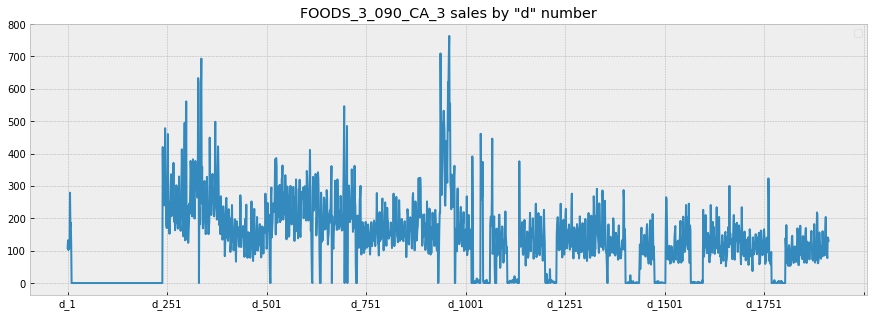

In [6]:
d_cols = [c for c in stv.columns if 'd_' in c] # sales data columns
# d_がカラム名に含まれているカラムのみ抽出して配列として保持

# Below we are chaining the following steps in pandas:
# 下のメソッドチェーンでは以下に示すデータ処理をpandasで行なっています。
# 1. Select the item.
# 商品の絞り込みを行います。
# 2. Set the id as the index, Keep only sales data columns
# idについてはindexとして保持するようにします。また、d_とつくカラムのみにデータを絞っています。
# 3. Transform so it's a column
# このままでは行なので、列に変えます。(一行を転置して一列にしている。)
# 4. Plot the data
# プロットしている。
stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'] \
    .set_index('id')[d_cols] \
    .T \
    .plot(figsize=(15, 5),
          title='FOODS_3_090_CA_3 sales by "d" number',
          color=next(color_cycle))
plt.legend('')
plt.show()


In [7]:
cal[['d','date','event_name_1','event_name_2',
     'event_type_1','event_type_2', 'snap_CA']].head()

d        date event_name_1 event_name_2 event_type_1 event_type_2  \
0  d_1  2011-01-29          NaN          NaN          NaN          NaN   
1  d_2  2011-01-30          NaN          NaN          NaN          NaN   
2  d_3  2011-01-31          NaN          NaN          NaN          NaN   
3  d_4  2011-02-01          NaN          NaN          NaN          NaN   
4  d_5  2011-02-02          NaN          NaN          NaN          NaN   

   snap_CA  
0        0  
1        0  
2        0  
3        1  
4        1

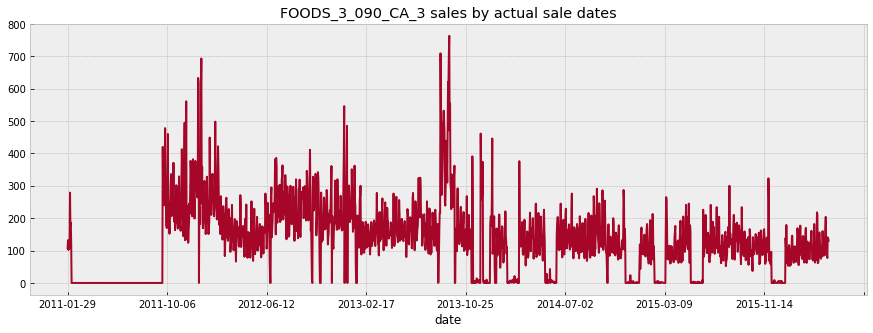

In [8]:
# Merge calendar on our items' data
# ここから、カレンダーcsvをstv(商品データ)にjoinしていく。
example = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T
#↑先ほどのメソッドチェーンと同様の処理を行なっている。
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) # Name it correctly
#indexがカラム名になっていたので、それを商品IDに変更
example = example.reset_index().rename(columns={'index': 'd'}) # make the index "d"
#indexを新たに付与
example = example.merge(cal, how='left', validate='1:1')
#↑ここで、calendarとjoinする。
example.set_index('date')['FOODS_3_090_CA_3'].plot(figsize=(15, 5),
                                                   color=next(color_cycle),
                                                   title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

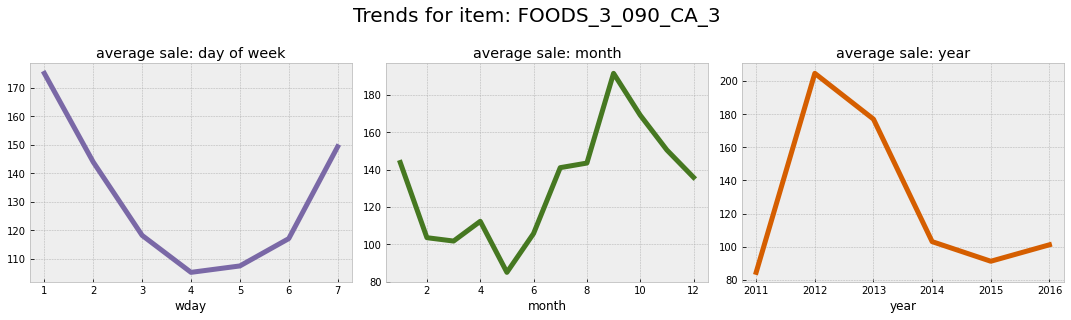

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
example.groupby('wday').mean()['FOODS_3_090_CA_3'] \
    .plot(kind='line',
          title='average sale: day of week',
          lw=5,
          color=next(
              color_cycle),
          ax=ax1)
#↑曜日で一括りにして平均をとる
example.groupby('month').mean()['FOODS_3_090_CA_3'] \
    .plot(kind='line',
          title='average sale: month',
          lw=5,
          color=next(
               color_cycle),

          ax=ax2)
#↑月で一括りにして平均をとる
example.groupby('year').mean()['FOODS_3_090_CA_3'] \
    .plot(kind='line',
          lw=5,
          title='average sale: year',
          color=next(
              color_cycle),

          ax=ax3)
#↑年で一括りにして平均をとる
fig.suptitle('Trends for item: FOODS_3_090_CA_3',
             size=20,
             y=1.1)
plt.tight_layout()
plt.show()

In [10]:
twenty_examples = stv.sample(20, random_state=529) \
        .set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')
# 20個抽出しています。

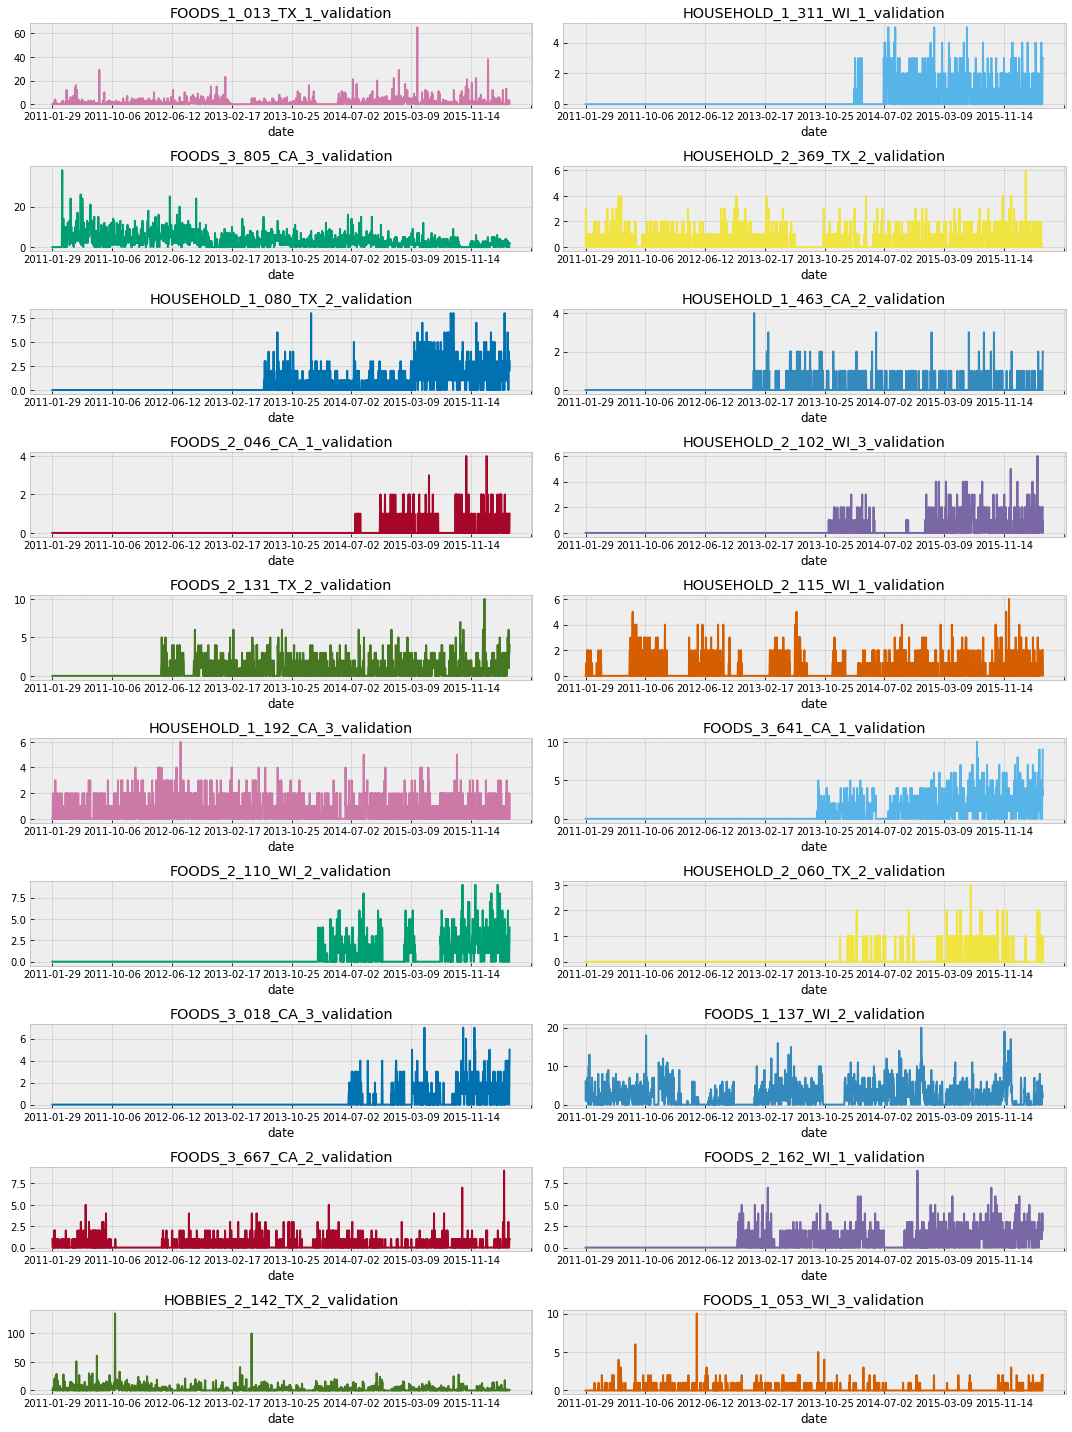

In [11]:
fig, axs = plt.subplots(10, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in twenty_examples.columns:
    twenty_examples[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()
# それぞれの商品毎にデータを表示しています。

In [12]:
stv['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

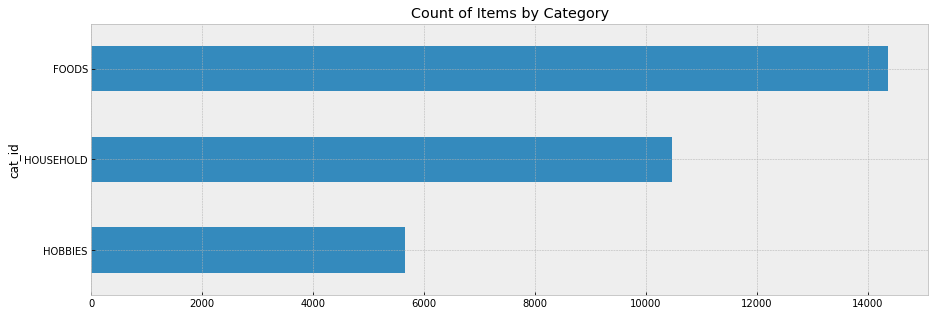

In [13]:
stv.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()
# カテゴリー毎の品目数を表示

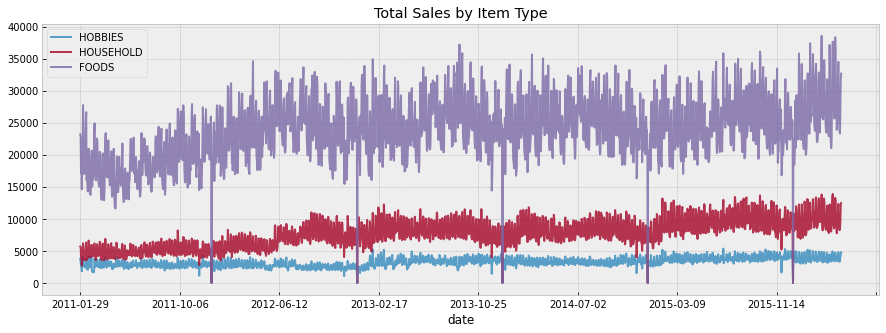

In [14]:
past_sales = stv.set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')
# 商品のデータを上の処理と同じように転置して、日付データとjoinしています。
for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(stv['cat_id'].unique())
plt.show()
#カテゴリー毎のその日に売れた合計数を表しています。

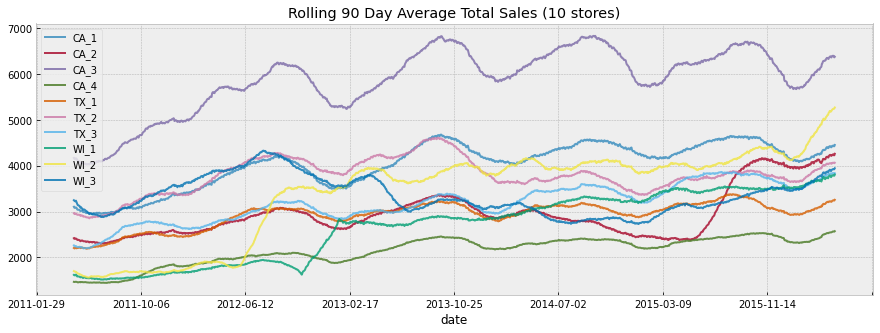

In [15]:
store_list = sellp['store_id'].unique()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(90).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 90 Day Average Total Sales (10 stores)')
plt.legend(store_list)
plt.show()

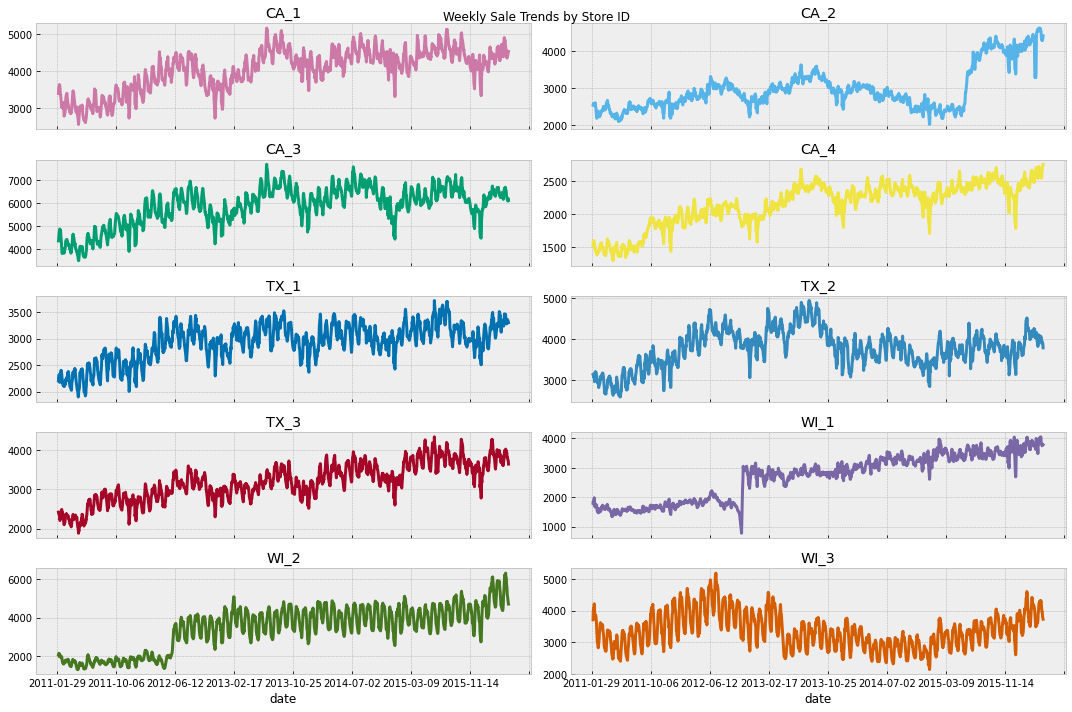

In [16]:
fig, axes = plt.subplots(5, 2, figsize=(15, 10), sharex=True)
axes = axes.flatten()
ax_idx = 0
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    #その店舗にある商品idの配列をとっています。
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(7).mean() \
        .plot(alpha=1,
              ax=axes[ax_idx],
              title=s,
              lw=3,
              color=next(color_cycle))
    #past salesは商品の売上データを時系列グラフで表現しやすいように転置、カレンダーデータとjoinしたものです。
    #その日の商品の売上の合計をだし、
    #rolling 7をすることでその日から一週間前までの売上の平均ととっています。
    ax_idx += 1
# plt.legend(store_list)
plt.suptitle('Weekly Sale Trends by Store ID')
plt.tight_layout()
plt.show()

In [17]:
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta


def calmap(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("{}".format(year), weight="semibold")
    
    # Clearing first and last day from the data
    valid = datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    # Showing data
    ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=-1, vmax=1,
              cmap="RdYlBu_r", origin="lower", alpha=.75)
# 軸と年数とデータを渡せばヒートマップを作ってくれるメソッドです。

In [18]:
print('The lowest sale date was:', past_sales.sum(axis=1).sort_values().index[0])
print('The highest sale date was:', past_sales.sum(axis=1).sort_values(ascending=False).index[0])

The lowest sale date was: 2012-12-25
The highest sale date was: 2016-03-06


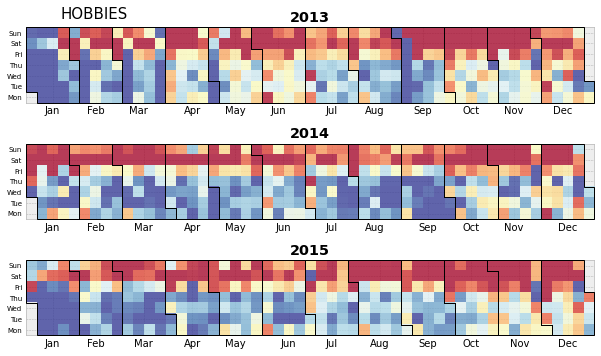

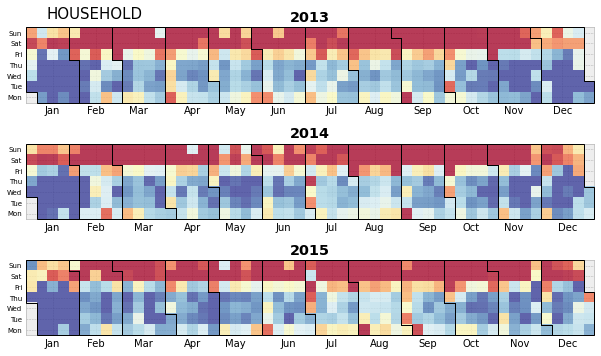

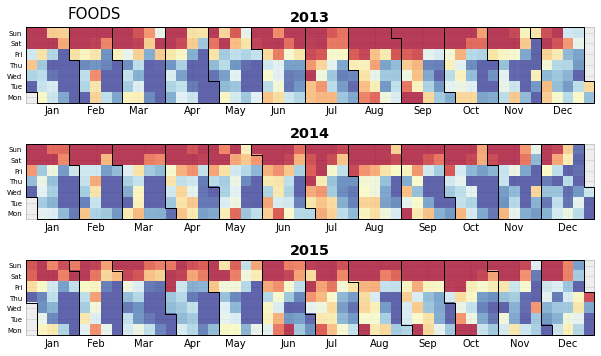

In [19]:
from sklearn.preprocessing import StandardScaler
sscale = StandardScaler()
past_sales.index = pd.to_datetime(past_sales.index)
for i in stv['cat_id'].unique():
    fig, axes = plt.subplots(3, 1, figsize=(15, 5))
    items_col = [c for c in past_sales.columns if i in c]
    sales2013 = past_sales.loc[past_sales.index.isin(pd.date_range('31-Dec-2012',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2013.values.reshape(-1, 1)))
    calmap(axes[0], 2013, vals.reshape(53,7).T)
    sales2014 = past_sales.loc[past_sales.index.isin(pd.date_range('30-Dec-2013',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2014.values.reshape(-1, 1)))
    calmap(axes[1], 2014, vals.reshape(53,7).T)
    sales2015 = past_sales.loc[past_sales.index.isin(pd.date_range('29-Dec-2014',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2015.values.reshape(-1, 1)))
    calmap(axes[2], 2015, vals.reshape(53,7).T)
    plt.suptitle(i, fontsize=15, x=0.3, y=0.98)
    plt.tight_layout()
    plt.show()

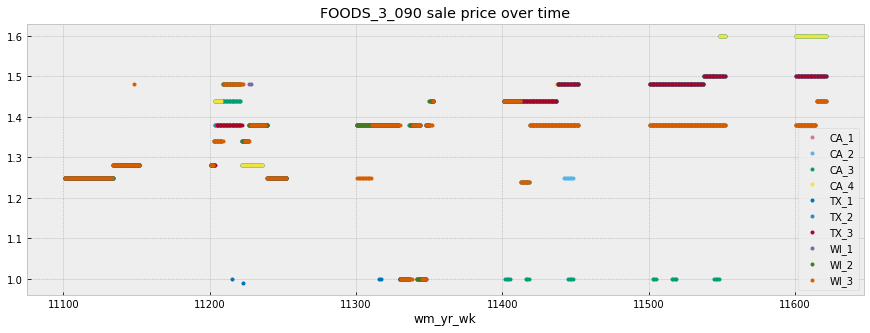

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
stores = []
for store, d in sellp.query('item_id == "FOODS_3_090"').groupby('store_id'):
    d.plot(x='wm_yr_wk',
          y='sell_price',
          style='.',
          color=next(color_cycle),
          figsize=(15, 5),
          title='FOODS_3_090 sale price over time',
         ax=ax,
          legend=store)
    stores.append(store)
    # まず、商品IDで絞り込み、店ごとにgroupbyします。
    # 販売価格をそれぞれプロットします。
    plt.legend()
plt.legend(stores)
plt.show()

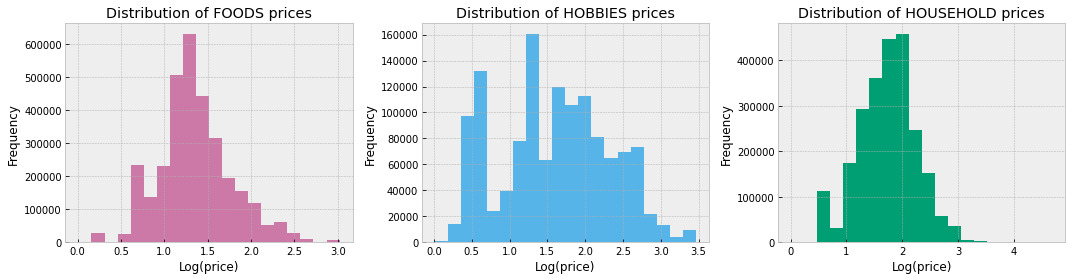

In [21]:
sellp['Category'] = sellp['item_id'].str.split('_', expand=True)[0]
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
i = 0
for cat, d in sellp.groupby('Category'):
    ax = d['sell_price'].apply(np.log1p) \
        .plot(kind='hist',
                         bins=20,
                         title=f'Distribution of {cat} prices',
                         ax=axs[i],
                                         color=next(color_cycle))
    # 販売単価をカテゴリーごとにgroup byする。
    # 販売単価を自然対数を底にlogをとり、どの金額範囲にどの程度の商品数が分布しているかを表示している。
    ax.set_xlabel('Log(price)')
    i += 1
plt.tight_layout()

In [22]:
thirty_day_avg_map = stv.set_index('id')[d_cols[-30:]].mean(axis=1).to_dict()
fcols = [f for f in ss.columns if 'F' in f]
for f in fcols:
    ss[f] = ss['id'].map(thirty_day_avg_map).fillna(0)
    
ss.to_csv('submission.csv', index=False)

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from sklearn import preprocessing, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Dropout
from keras.layers import RepeatVector,TimeDistributed
from numpy import array
from keras.models import Sequential, load_model
#import utils_paths
import re
from tqdm import tqdm
import os

Using TensorFlow backend.


In [24]:
train_sales = stv
calendar = cal
# sellp = pd.read_csv(f'{INPUT_DIR}/sell_prices.csv')
sell_prices = sellp
submission_file = ss

In [25]:
def transform(data):
    
    nan_features = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
    for feature in nan_features:
        data[feature].fillna('unknown', inplace = True)
        
    cat = ['event_name_1','event_type_1','event_name_2','event_type_2','snap_CA','snap_TX','snap_WI']
    for feature in cat:
        encoder = preprocessing.LabelEncoder()
        data[feature] = encoder.fit_transform(data[feature])
    
    return data
#calendarの何もない日をunknownで埋めて、label encoderによって処理しやすい形に変えた。

In [26]:
days = range(1, 1970)
time_series_columns = [f'd_{i}' for i in days]
transfer_cal = pd.DataFrame(calendar[['event_name_1','event_type_1','event_name_2','event_type_2','snap_CA','snap_TX','snap_WI']].values.T, index=['event_name_1','event_type_1','event_name_2','event_type_2','snap_CA','snap_TX','snap_WI'], columns= time_series_columns)
transfer_cal = transfer_cal.fillna(0)
event_name_1_se = transfer_cal.loc['event_name_1'].apply(lambda x: x if re.search("^\d+$", str(x)) else np.nan).fillna(10)
event_name_2_se = transfer_cal.loc['event_name_2'].apply(lambda x: x if re.search("^\d+$", str(x)) else np.nan).fillna(10)
#↑event nameが入っているものをnanにした後、10にしている。

In [27]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar = calendar[calendar['date']>= '2016-1-27']  #reduce memory
#使うデータを少なくします。
calendar= transform(calendar)
# Attempts to convert events into time series data.
transfer_cal = pd.DataFrame(calendar[['event_name_1','event_type_1','event_name_2','event_type_2','snap_CA','snap_TX','snap_WI']].values.T,
                            index=['event_name_1','event_type_1','event_name_2','event_type_2','snap_CA','snap_TX','snap_WI'])
transfer_cal

0    1    2    3    4    5    6    7    8    9    10   11   12   \
event_name_1   16   16   16   16   16   16   16   16   16   16   16   14   16   
event_type_1    4    4    4    4    4    4    4    4    4    4    4    3    4   
event_name_2    1    1    1    1    1    1    1    1    1    1    1    1    1   
event_type_2    1    1    1    1    1    1    1    1    1    1    1    1    1   
snap_CA         0    0    0    0    0    1    1    1    1    1    1    1    1   
snap_TX         0    0    0    0    0    1    0    1    0    1    1    1    0   
snap_WI         0    0    0    0    0    0    1    1    0    1    1    0    1   

              13   14   15   16   17   18   19   20   21   22   23   24   ...  \
event_name_1   16    2   16   16   16   15   10   16    3   16   16   16  ...   
event_type_1    4    2    4    4    4    0    1    4    2    4    4    4  ...   
event_name_2    1    1    1    1    1    1    1    1    1    1    1    1  ...   
event_type_2    1    1    1    1    1    1    1    1    1    1    1    1  ...   
snap_CA         1    1    0    0    0    0    0    0    0    0    0    0  ...   
snap_TX         1    0    1    1    1    0    1    0    0    0    0    0  ...   
snap_WI         1    0    1    1    0    1    1    0    0    0    0    0  ...   

              120  121  122  123  124  125  126  127  128  129  130  131  132  \
event_name_1   16   16   16   16    4   16   16    7   16   16   16   16   12   
event_type_1    4    4    4    4    1    4    4    3    4    4    4    4    2   
event_name_2    1    1    1    1    1    1    1    1    1    1    1    1    1   
event_type_2    1    1    1    1    1    1    1    1    1    1    1    1    1   
snap_CA         0    0    0    0    0    0    1    1    1    1    1    1    1   
snap_TX         0    0    0    0    0    0    1    0    1    0    1    1    1   
snap_WI         0    0    0    0    0    0    0    1    1    0    1    1    0   

              133  134  135  136  137  138  139  140  141  142  143  144  
event_name_1   16   16   16   16   16   16   16   16   16   16   16    6  
event_type_1    4    4    4    4    4    4    4    4    4    4    4    3  
event_name_2    1    1    1    1    1    1    1    1    1    1    1    0  
event_type_2    1    1    1    1    1    1    1    1    1    1    1    0  
snap_CA         1    1    1    0    0    0    0    0    0    0    0    0  
snap_TX         0    1    0    1    1    1    0    1    0    0    0    0  
snap_WI         1    1    0    1    1    0    1    1    0    0    0    0  

[7 rows x 145 columns]

In [28]:
price_fea = calendar[['wm_yr_wk','date']].merge(sell_prices, on = ['wm_yr_wk'], how = 'left')
#販売価格に対して、calendarを結合した。
price_fea['id'] = price_fea['item_id']+'_'+price_fea['store_id']+'_validation'
df = price_fea.pivot('id','date','sell_price')
#各商品を一行にして、商品の値段の移り変わりを表した。

In [29]:
price_df = train_sales.merge(df,on=['id'],how= 'left').iloc[:,-145:]
price_df.index = train_sales.id
price_df.head()
#train salesに値段の移り変わりをのデータをjoinした。

2016-01-27  2016-01-28  2016-01-29  2016-01-30  \
id                                                                              
HOBBIES_1_001_CA_1_validation        8.26        8.26        8.26        8.26   
HOBBIES_1_002_CA_1_validation        3.97        3.97        3.97        3.97   
HOBBIES_1_003_CA_1_validation        2.97        2.97        2.97        2.97   
HOBBIES_1_004_CA_1_validation        4.64        4.64        4.64        4.64   
HOBBIES_1_005_CA_1_validation        2.88        2.88        2.88        2.88   

                               2016-01-31  2016-02-01  2016-02-02  2016-02-03  \
id                                                                              
HOBBIES_1_001_CA_1_validation        8.26        8.26        8.26        8.26   
HOBBIES_1_002_CA_1_validation        3.97        3.97        3.97        3.97   
HOBBIES_1_003_CA_1_validation        2.97        2.97        2.97        2.97   
HOBBIES_1_004_CA_1_validation        4.64        4.64        4.64        4.64   
HOBBIES_1_005_CA_1_validation        2.88        2.88        2.88        2.88   

                               2016-02-04  2016-02-05  2016-02-06  2016-02-07  \
id                                                                              
HOBBIES_1_001_CA_1_validation        8.26        8.26        8.26        8.26   
HOBBIES_1_002_CA_1_validation        3.97        3.97        3.97        3.97   
HOBBIES_1_003_CA_1_validation        2.97        2.97        2.97        2.97   
HOBBIES_1_004_CA_1_validation        4.64        4.64        4.64        4.64   
HOBBIES_1_005_CA_1_validation        2.88        2.88        2.88        2.88   

                               2016-02-08  2016-02-09  2016-02-10  2016-02-11  \
id                                                                              
HOBBIES_1_001_CA_1_validation        8.26        8.26        8.26        8.26   
HOBBIES_1_002_CA_1_validation        3.97        3.97        3.97        3.97   
HOBBIES_1_003_CA_1_validation        2.97        2.97        2.97        2.97   
HOBBIES_1_004_CA_1_validation        4.64        4.64        4.64        4.64   
HOBBIES_1_005_CA_1_validation        2.88        2.88        2.88        2.88   

                               2016-02-12  2016-02-13  2016-02-14  2016-02-15  \
id                                                                              
HOBBIES_1_001_CA_1_validation        8.26        8.26        8.26        8.26   
HOBBIES_1_002_CA_1_validation        3.97        3.97        3.97        3.97   
HOBBIES_1_003_CA_1_validation        2.97        2.97        2.97        2.97   
HOBBIES_1_004_CA_1_validation        4.64        4.64        4.64        4.64   
HOBBIES_1_005_CA_1_validation        2.88        2.88        2.88        2.88   

                               2016-02-16  2016-02-17  2016-02-18  2016-02-19  \
id                                                                              
HOBBIES_1_001_CA_1_validation        8.26        8.26        8.26        8.26   
HOBBIES_1_002_CA_1_validation        3.97        3.97        3.97        3.97   
HOBBIES_1_003_CA_1_validation        2.97        2.97        2.97        2.97   
HOBBIES_1_004_CA_1_validation        4.64        4.64        4.64        4.64   
HOBBIES_1_005_CA_1_validation        2.88        2.88        2.88        2.88   

                               2016-02-20  ...  2016-05-26  2016-05-27  \
id                                         ...                           
HOBBIES_1_001_CA_1_validation        8.26  ...        8.38        8.38   
HOBBIES_1_002_CA_1_validation        3.97  ...        3.97        3.97   
HOBBIES_1_003_CA_1_validation        2.97  ...        2.97        2.97   
HOBBIES_1_004_CA_1_validation        4.64  ...        4.64        4.64   
HOBBIES_1_005_CA_1_validation        2.88  ...        2.88        2.88   

                               2016-05-28  2016-05-29  2016-05-30  2016-05-31  \
id                     

In [30]:
days = range(1, 1913 + 1)
time_series_columns = [f'd_{i}' for i in days]
time_series_data = train_sales[time_series_columns]  #Get time series data
#train_salesから売り上げデータのみを抽出

(28,)


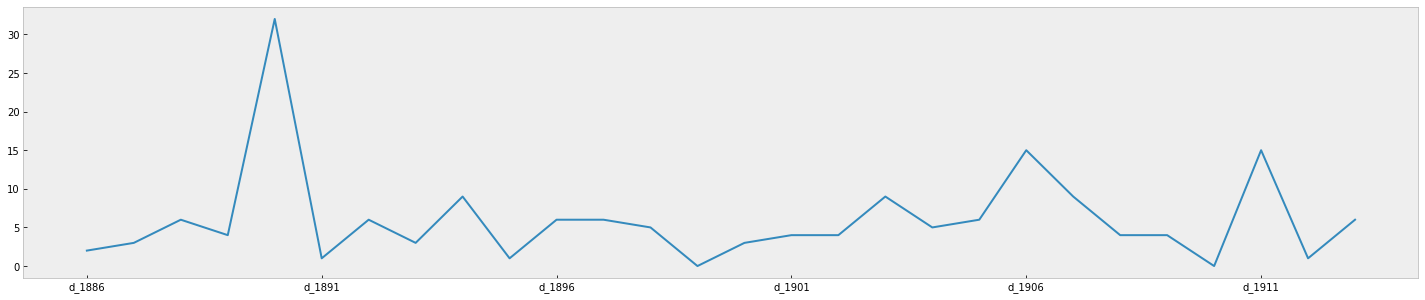

In [31]:
#show last 28days
figsize = (25, 5)
time_series_data.iloc[15, -28:].plot(figsize=figsize)
#15行目の最新28日の売り上げデータを表示している。
plt.grid()
#The last 28 days
print(time_series_data.iloc[0, 1885:].shape)

## ここまで
・calendarの何もない日をunknownで埋めて、label encoderによって処理しやすい形に変えた。

・↑event nameが入っているものをnanにした後、10にしている。

・使うデータを少なくします。
 →2016-1-27以前のデータをカット

・

以下商品の価格と売り上げの関係性を見る

In [32]:
def min_max(df):
    return (df-df.mean())/df.std()  #scale

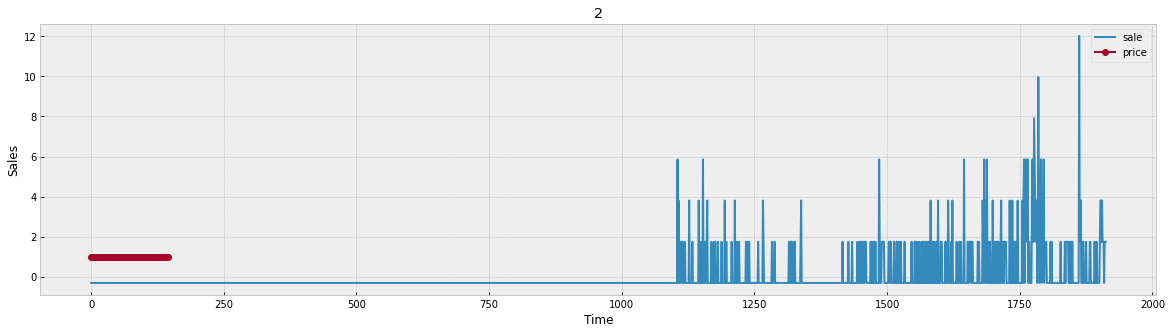

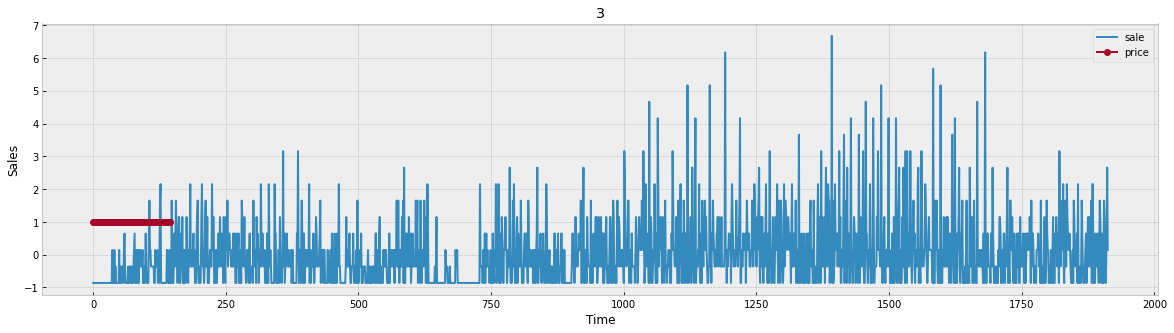

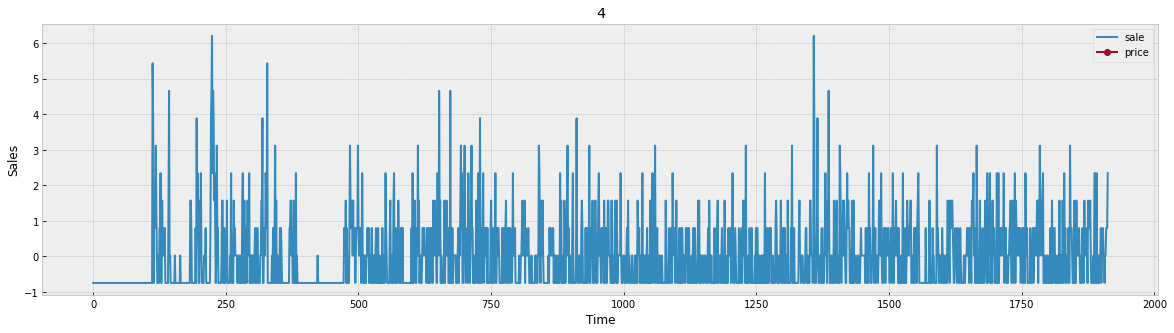

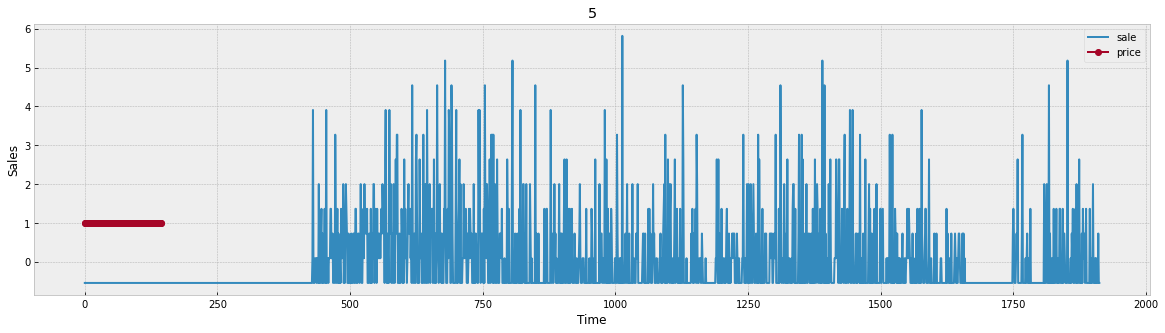

In [33]:
for i in range(2,6):
    price_sell = calendar.merge(sell_prices[sell_prices.item_id=='HOBBIES_1_00'+str(i)][sell_prices.store_id=='CA_1'], on = ['wm_yr_wk'], how = 'left')
    #商品の絞り込みを行う
    fig =plt.figure(figsize= (20, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(min_max(time_series_data.iloc[i].values))
    ax.plot(min_max(price_sell.sell_price),'-o')
    plt.legend(['sale','price'])
    ax.set_title(str(i))
    ax.set_xlabel('Time')
    ax.set_ylabel('Sales')


売り上げとイベントの関係性を見る

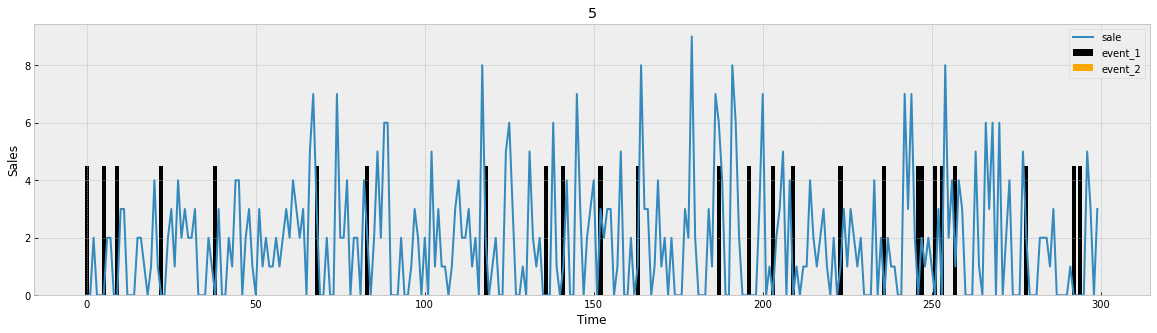

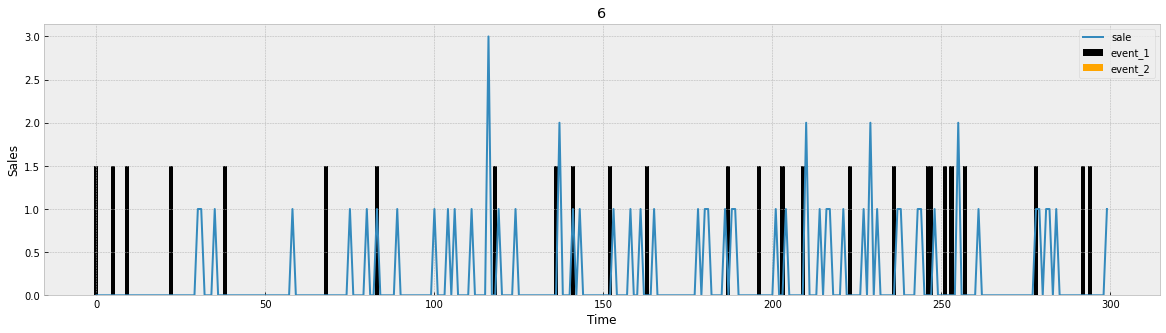

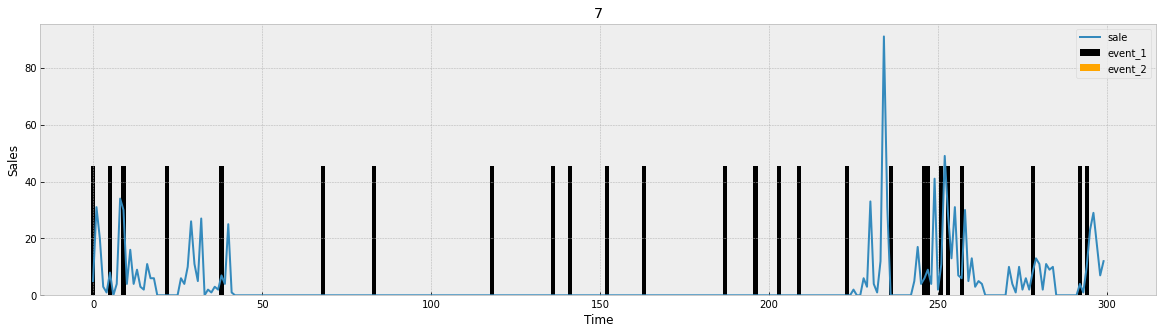

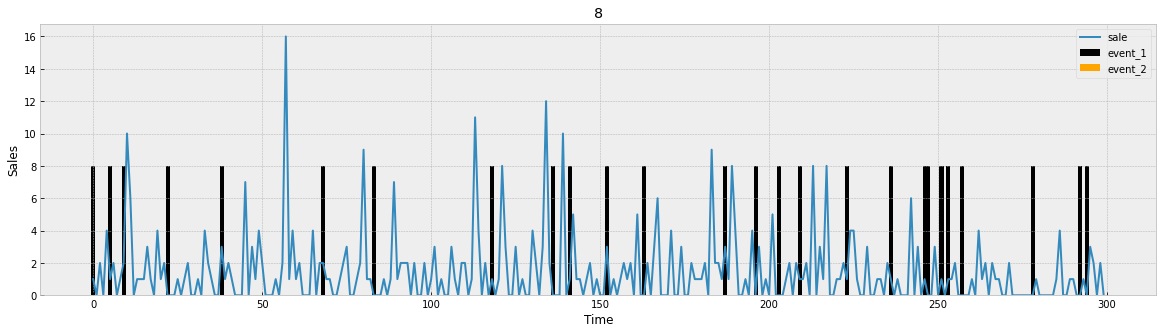

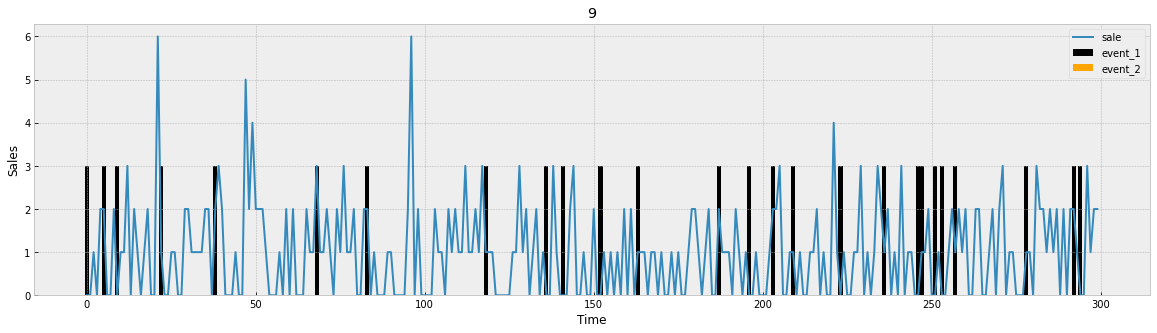

In [34]:
for i in range(5,10):
    fig =plt.figure(figsize= (20, 5))
    ax = fig.add_subplot(1, 1, 1)
    #ax.bar(x = range(len(transfer_cal.loc['snap_WI'][1500:1800].values)),height = transfer_cal.loc['snap_TX'][1500:1800].values,label='snap_TX',facecolor='red')
    ax.plot(time_series_data.iloc[i, 500:800].values,label='sales')
    #5番目から10番目までの商品について、売上とイベントの相関を示している。
    ax.bar(x = range(300),height = event_name_1_se[500:800].values*0.05*time_series_data.iloc[i, 500:800].values.max(),label='type_1',facecolor='black',width=1.2)
    ax.bar(x = range(300),height = event_name_2_se[500:800].values*0.05*time_series_data.iloc[i, 500:800].values.max(),label='type_2',facecolor='orange',width=1.2)
    plt.legend(['sale','event_1','event_2'])
    ax.set_title(str(i))

    ax.set_xlabel('Time')
    ax.set_ylabel('Sales')

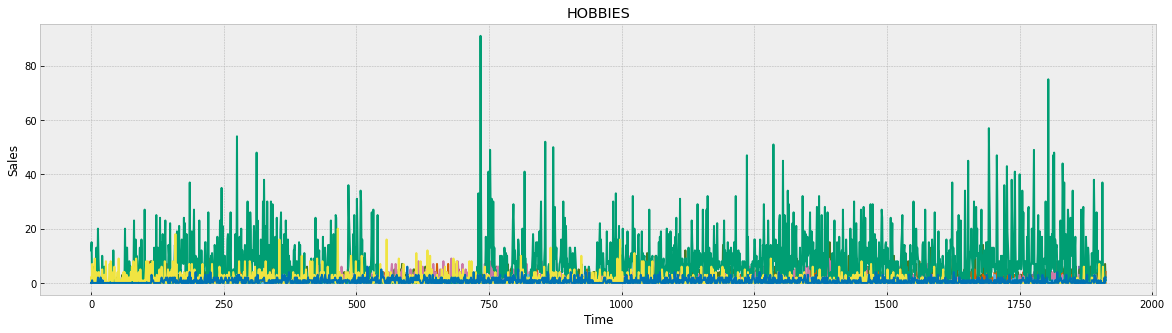

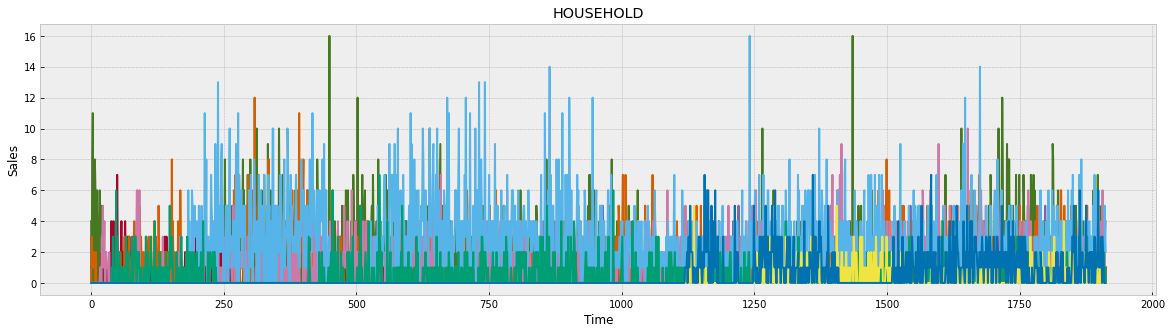

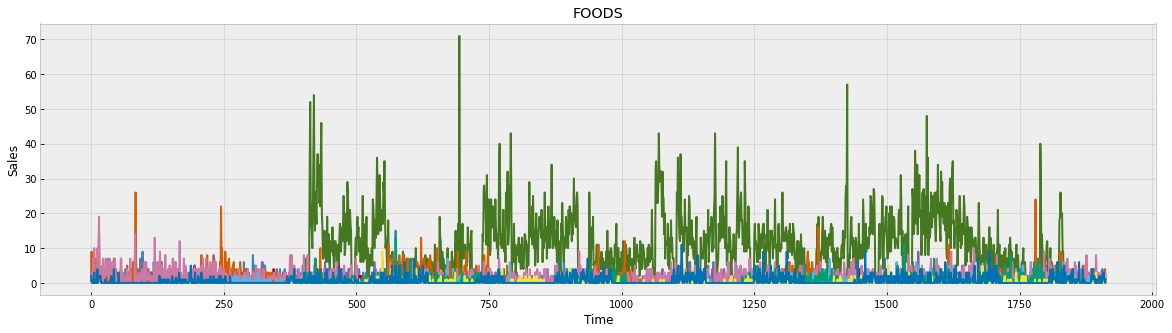

In [35]:
for i in train_sales.cat_id.unique():
    fig =plt.figure(figsize= (20, 5))
    for j in range(10):
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(train_sales[train_sales.cat_id==i].iloc[j, :][time_series_columns].values)
        #売上データからカテゴリーidで絞り込む
        #絞り込まれた商品データの上から10個の商品の値段の移り変わりを
        ax.set_title(str(i))
        ax.set_xlabel('Time')
        ax.set_ylabel('Sales')

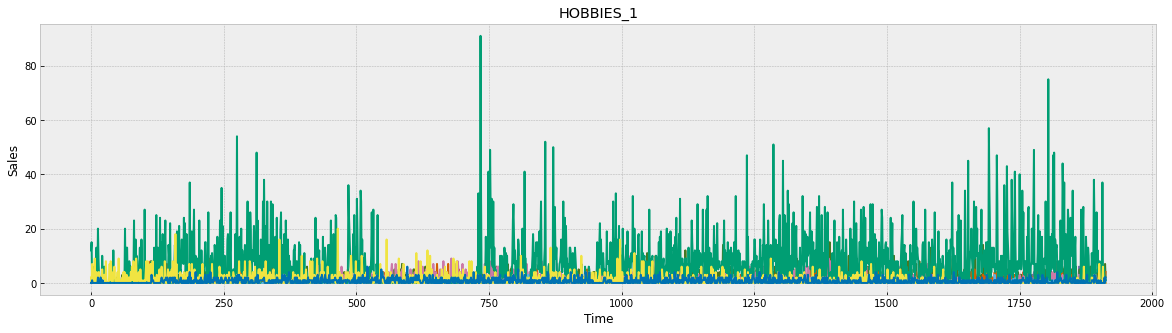

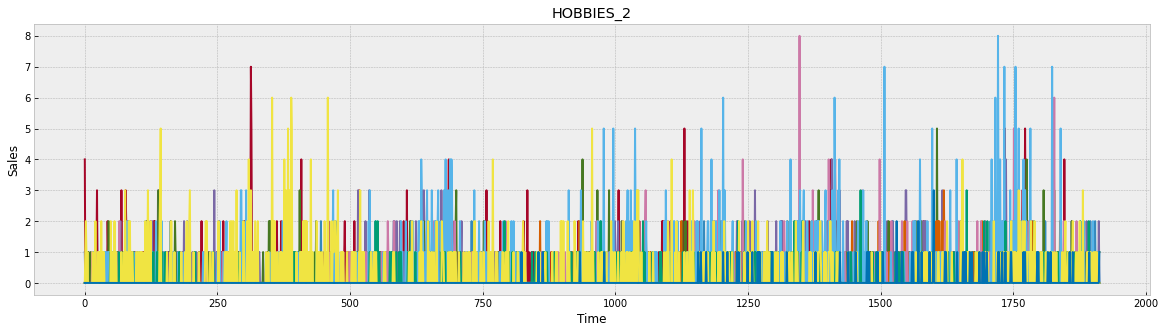

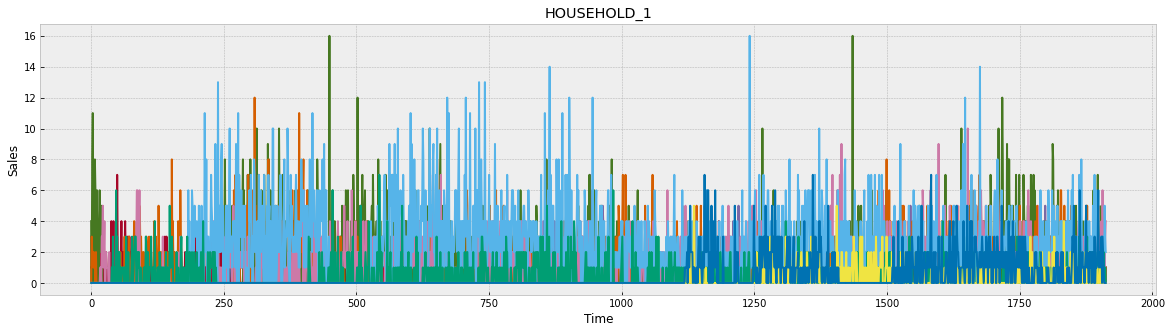

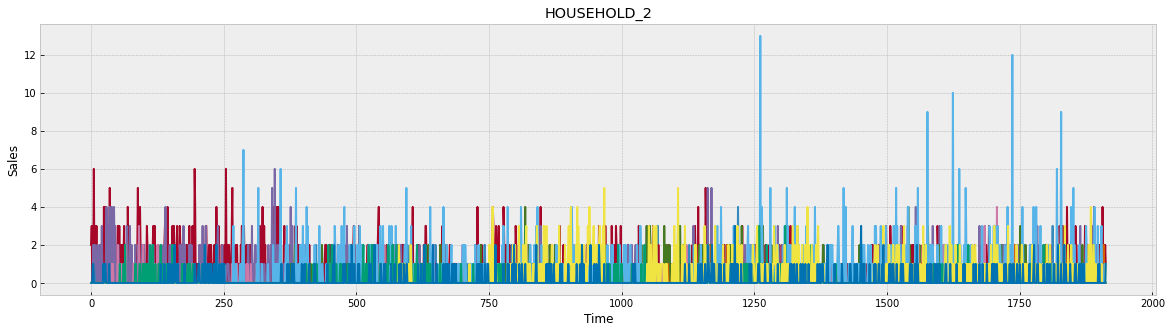

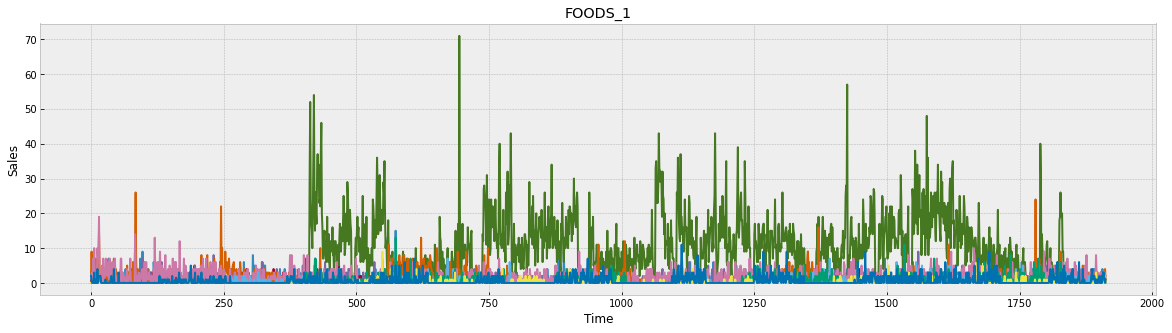

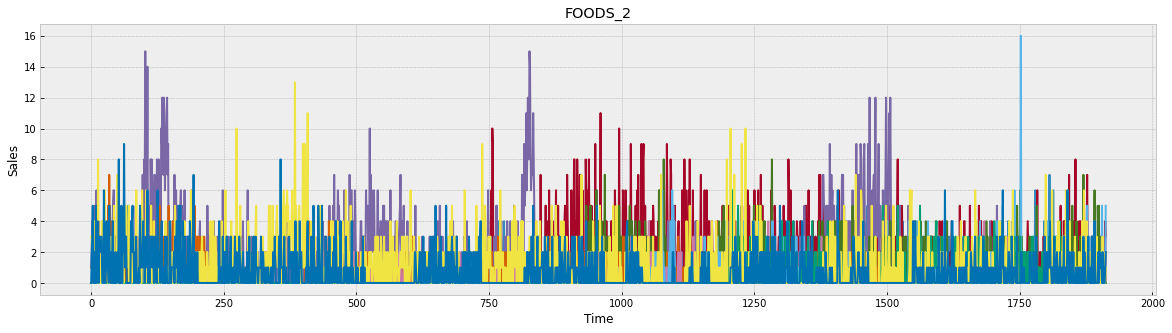

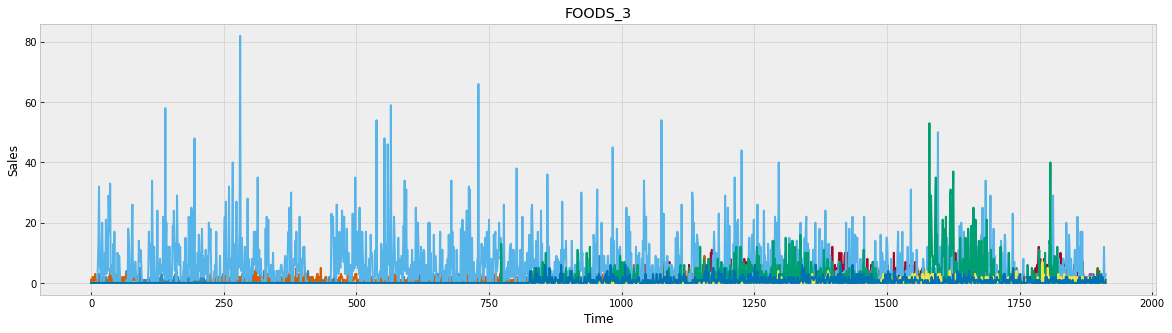

In [36]:
for i in train_sales.dept_id.unique():
    fig =plt.figure(figsize= (20, 5))
    for j in range(10):
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(train_sales[train_sales.dept_id==i].iloc[j, :][time_series_columns].values)
        ax.set_title(str(i))
        ax.set_xlabel('Time')
        ax.set_ylabel('Sales')
#商品のカテゴリーをもう少し詳しく分けた部門について、上のカテゴリーと同じように売上の変化グラフをだす。
#部門ごとにみることによって、カテゴリー毎の売上のばらつきがどの部門の商品に起因したものであったのかがわ

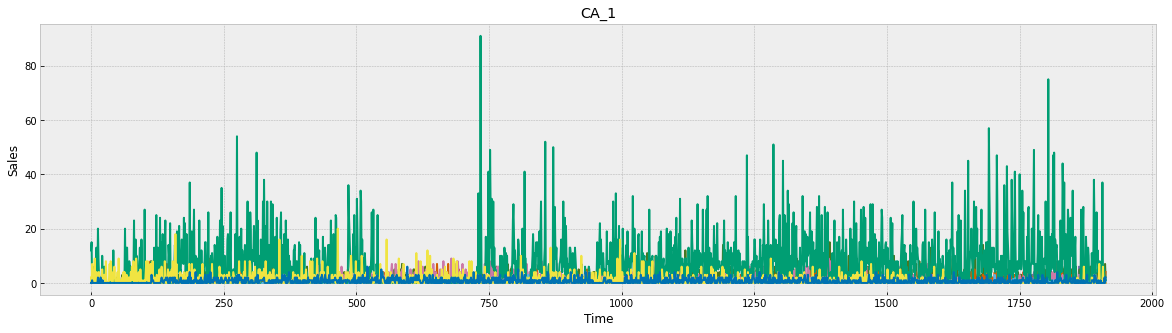

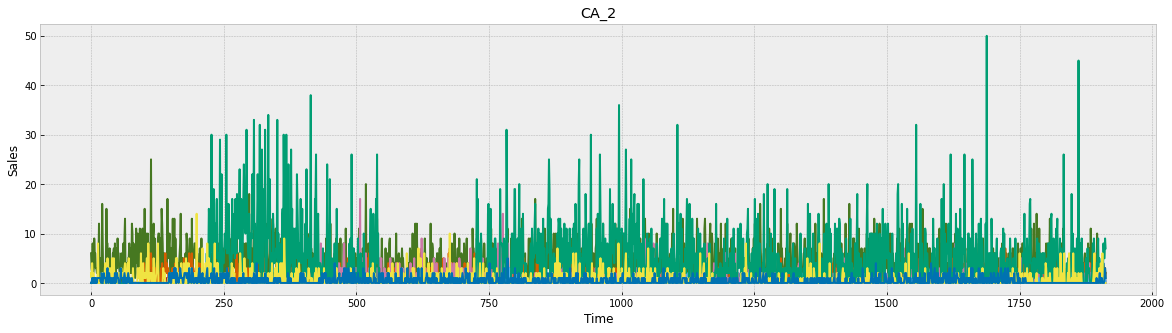

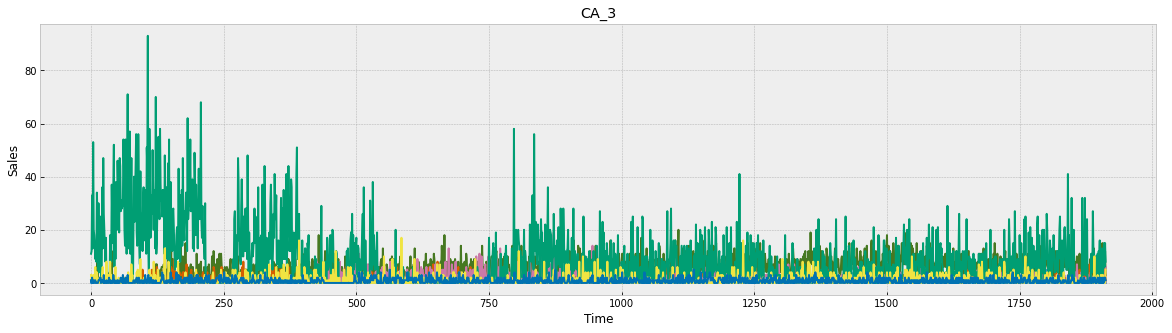

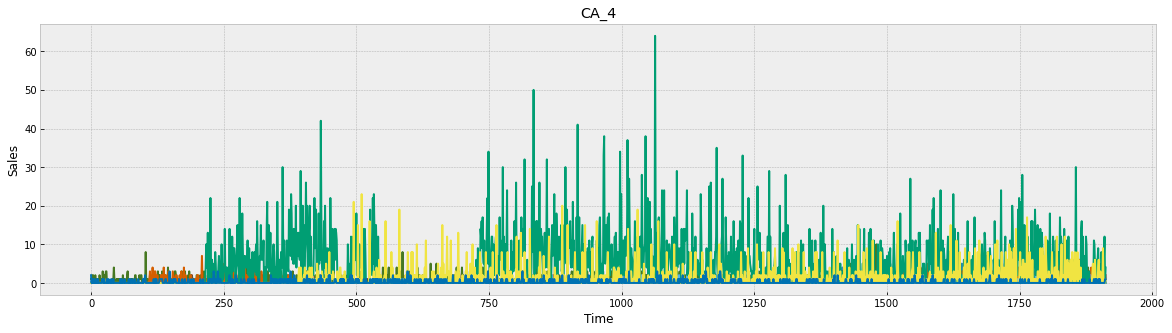

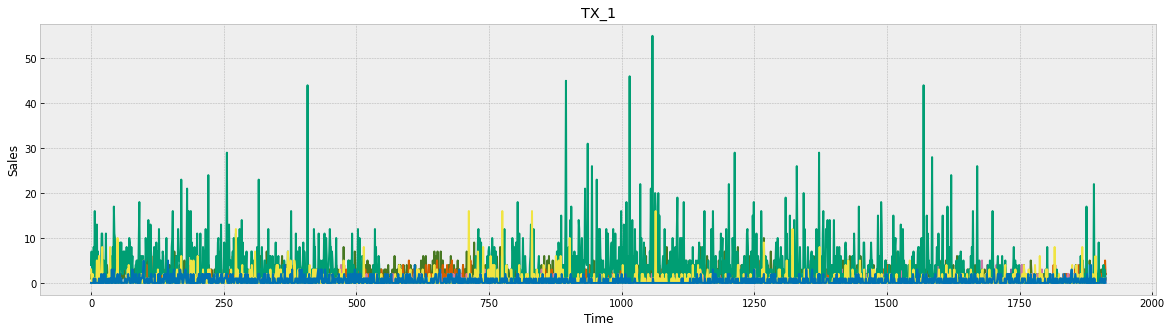

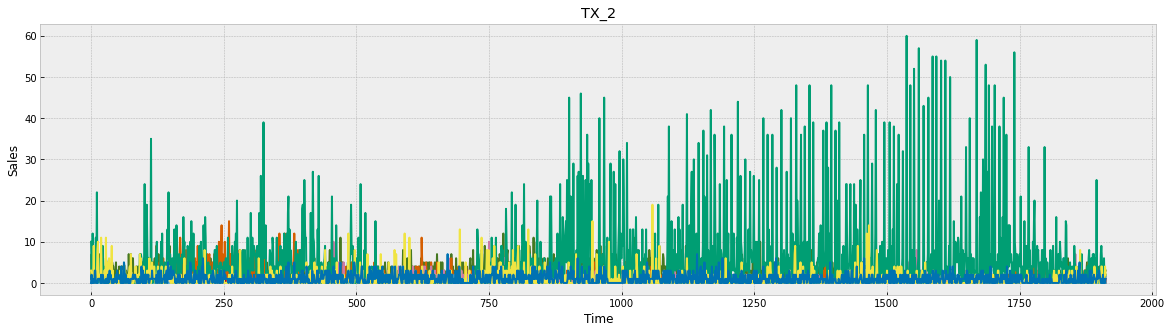

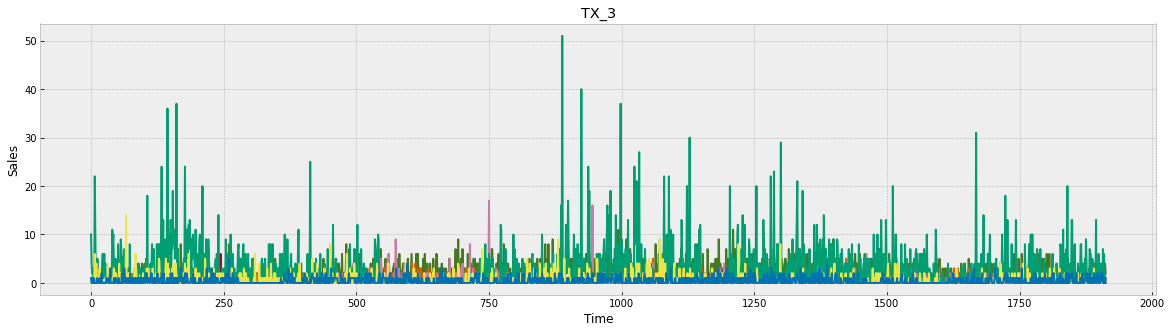

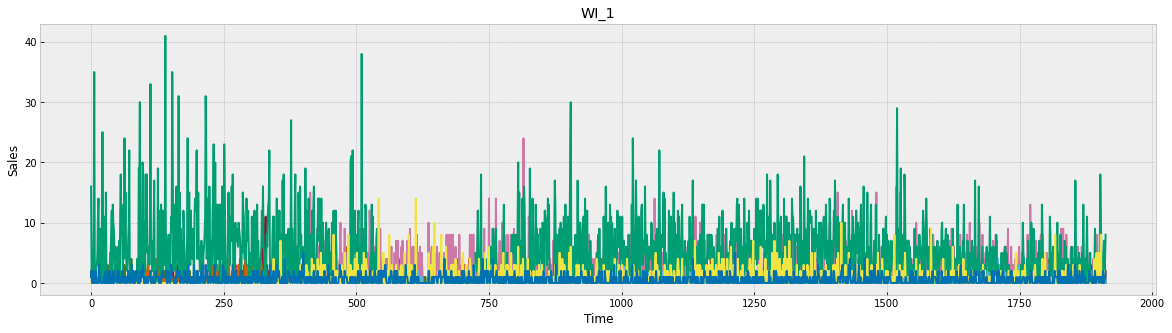

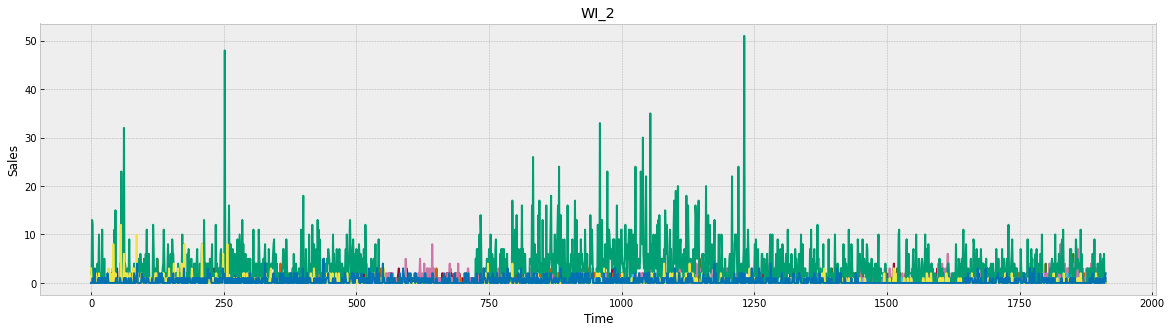

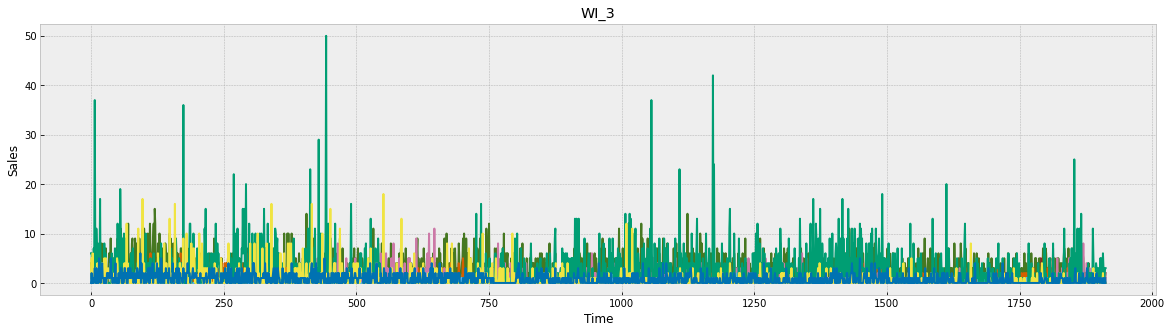

In [37]:
for i in train_sales.store_id.unique():
    fig =plt.figure(figsize= (20, 5))
    for j in range(10):
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(train_sales[train_sales.store_id==i].iloc[j, :][time_series_columns].values)
        ax.set_title(str(i))
        ax.set_xlabel('Time')
        ax.set_ylabel('Sales')
#店毎に売上の変化を見ている。

In [45]:
import tensorflow as tf
keras = tf.keras

from keras.layers import Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model

## LSTMモデル

In [38]:
X = []   #build a data with two features(salse and event1)
# 売上データとevent1のデータのみを格納する。
for i in tqdm(range(time_series_data.shape[0])):#30490列について、プログレスバー付きの繰り返しを行う
    X.append([list(t) for t in zip(transfer_cal.loc['event_name_1'][-(100+28):-(28)],
                                   transfer_cal.loc['event_type_1'][-(100+28):-(28)],
                                   transfer_cal.loc['event_name_2'][-(100+28):-(28)],     #emmmm.....Those features didn't work for me...
                                   transfer_cal.loc['event_type_2'][-(100+28):-(28)],
                                   transfer_cal.loc['snap_CA'][-(100+28):-(28)],
                                   transfer_cal.loc['snap_TX'][-(100+28):-(28)],
                                   transfer_cal.loc['snap_WI'][-(100+28):-(28)],
                                   price_df.iloc[i][-(100+28):-(28)],
                                   time_series_data.iloc[i][-100:])]) 
    #for t in zip(A, B, C, ...)によって、A, B, C, ...の要素それぞれの抽出を順番に行なっている
    #transfer colはtrainをlabel encodingしたもの
    #price dfは商品毎の値段の移り変わりを表したもの
    #time_series_dataはその商品の売上を表したもの
    #行列の形は次のようになっている。
    #まず、商品毎の軸が存在する
    #商品毎に次のデータが入れられる
    #日付毎に行列が用意される
    #その日付のカレンダー情報、その日の価格、売上が入れられる。
    
    #todo 特徴量を増やしつつ減らす
    #まずstoreとcatのidは大事これは入れる
    #stateも次くらいに大事
    
X = np.asarray(X, dtype=np.float32)

100%|██████████| 30490/30490 [01:01<00:00, 492.02it/s]


In [39]:
transfer_cal.loc['event_name_1'][-(100+28):-(28)]

17     16
18     15
19     10
20     16
21      3
       ..
112    16
113    16
114    16
115    16
116    16
Name: event_name_1, Length: 100, dtype: int64

In [40]:
transfer_cal.head(50)

0    1    2    3    4    5    6    7    8    9    10   11   12   \
event_name_1   16   16   16   16   16   16   16   16   16   16   16   14   16   
event_type_1    4    4    4    4    4    4    4    4    4    4    4    3    4   
event_name_2    1    1    1    1    1    1    1    1    1    1    1    1    1   
event_type_2    1    1    1    1    1    1    1    1    1    1    1    1    1   
snap_CA         0    0    0    0    0    1    1    1    1    1    1    1    1   
snap_TX         0    0    0    0    0    1    0    1    0    1    1    1    0   
snap_WI         0    0    0    0    0    0    1    1    0    1    1    0    1   

              13   14   15   16   17   18   19   20   21   22   23   24   ...  \
event_name_1   16    2   16   16   16   15   10   16    3   16   16   16  ...   
event_type_1    4    2    4    4    4    0    1    4    2    4    4    4  ...   
event_name_2    1    1    1    1    1    1    1    1    1    1    1    1  ...   
event_type_2    1    1    1    1    1    1    1    1    1    1    1    1  ...   
snap_CA         1    1    0    0    0    0    0    0    0    0    0    0  ...   
snap_TX         1    0    1    1    1    0    1    0    0    0    0    0  ...   
snap_WI         1    0    1    1    0    1    1    0    0    0    0    0  ...   

              120  121  122  123  124  125  126  127  128  129  130  131  132  \
event_name_1   16   16   16   16    4   16   16    7   16   16   16   16   12   
event_type_1    4    4    4    4    1    4    4    3    4    4    4    4    2   
event_name_2    1    1    1    1    1    1    1    1    1    1    1    1    1   
event_type_2    1    1    1    1    1    1    1    1    1    1    1    1    1   
snap_CA         0    0    0    0    0    0    1    1    1    1    1    1    1   
snap_TX         0    0    0    0    0    0    1    0    1    0    1    1    1   
snap_WI         0    0    0    0    0    0    0    1    1    0    1    1    0   

              133  134  135  136  137  138  139  140  141  142  143  144  
event_name_1   16   16   16   16   16   16   16   16   16   16   16    6  
event_type_1    4    4    4    4    4    4    4    4    4    4    4    3  
event_name_2    1    1    1    1    1    1    1    1    1    1    1    0  
event_type_2    1    1    1    1    1    1    1    1    1    1    1    0  
snap_CA         1    1    1    0    0    0    0    0    0    0    0    0  
snap_TX         0    1    0    1    1    1    0    1    0    0    0    0  
snap_WI         1    1    0    1    1    0    1    1    0    0    0    0  

[7 rows x 145 columns]

In [41]:
def Normalize(list):
    list = np.array(list)
    #配列の状態から行列に変換
    low, high = np.percentile(list, [0, 100])#todo ここの細かい動きが追えていない
    delta = high - low
    if delta != 0:
        for i in range(0, len(list)):
            list[i] = (list[i]-low)/delta
    return  list,low,high
#[0 1]に変換

def FNoramlize(list,low,high):
    delta = high - low
    if delta != 0:
        for i in range(0, len(list)):
            list[i] = list[i]*delta + low
    return list
#normalizeされた値を元に戻す

def Normalize2(list,low,high):
    list = np.array(list)
    delta = high - low
    if delta != 0:
        for i in range(0, len(list)):
            list[i] = (list[i]-low)/delta
    return  list


In [47]:
np.random.seed(7)

 ## I only use the last 56 days for train_data.
if __name__ == '__main__':
    n_steps = 28
    train_n,train_low,train_high = Normalize(X[:,-(n_steps*2):,:])
    #Xのデータのうち、56日間のみのデータを抽出、それをNormalizeする。
    X_train = train_n[:,-28*2:-28,:]
    #56日前から28日前までを選択
    y = train_n[:,-28:,8]  #ここには全種類の商品の28日間の売上の情報のみ抽出
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    n_features = 9
    n_out_seq_length =28
    num_y = 1
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    y = y.reshape((y.shape[0], y.shape[1], 1))
    print(X_train.shape)
    # define model

    model = tf.keras.models.Sequential()

    
    model.add(tf.keras.layers.LSTM(128, activation='relu', input_shape=(28, n_features),return_sequences=False))
    model.add(tf.keras.layers.RepeatVector(n_out_seq_length))
    model.add(tf.keras.layers.LSTM(32, activation='relu',return_sequences=True))
   #model.add(Dropout(0.1))  
    model.add(tf.keras.layers.TimeDistributed(Dense(num_y)))   # num_y means the shape of y,in some problem(like translate), it can be many.
                                                #In that case, you should set the  activation= 'softmax'
    model.compile(optimizer='adam', loss='mse')
    # demonstrate prediction
    model.fit(X_train, y, epochs=10, batch_size=1000)

(30490, 28, 9)
Train on 30490 samples
Epoch 1/10
30490/30490 [==============================] - 6s 198us/sample - loss: 1.9201e-04
Epoch 2/10
30490/30490 [==============================] - 5s 161us/sample - loss: 9.5302e-05
Epoch 3/10
30490/30490 [==============================] - 5s 160us/sample - loss: 8.6406e-05
Epoch 4/10
30490/30490 [==============================] - 5s 164us/sample - loss: 8.5148e-05
Epoch 5/10
30490/30490 [==============================] - 5s 162us/sample - loss: 8.3003e-05
Epoch 6/10
30490/30490 [==============================] - 5s 163us/sample - loss: 8.1652e-05
Epoch 7/10
30490/30490 [==============================] - 5s 164us/sample - loss: 8.1680e-05
Epoch 8/10
30490/30490 [==============================] - 5s 168us/sample - loss: 8.0400e-05
Epoch 9/10
30490/30490 [==============================] - 5s 171us/sample - loss: 8.0315e-05
Epoch 10/10
30490/30490 [==============================] - 5s 168us/sample - loss: 8.1440e-05


In [48]:
num = 30490 # number of traindata
x_input = array(X_train[:,-n_steps*1:])
x_input = x_input.reshape((num, n_steps*1, n_features))
#x_trainはもともと未来28日分までのデータを持っている。それをinputデータとした
print(x_input.shape)
#x_input = Normalize2(x_input,train_low,train_high)
yhat = model.predict(x_input[:,-n_steps:], verbose=0)
x_input=np.concatenate((x_input[:,:,8].reshape(x_input.shape[0],x_input.shape[1]),yhat.astype(np.float32).reshape(x_input.shape[0],x_input.shape[1])),axis=1).reshape((x_input.shape[0],x_input.shape[1]+28,1))
#print(yhat)
print(x_input.shape)
x_input = FNoramlize(x_input,train_low,train_high)
x_input = np.rint(x_input)
#整数にしている
forecast = pd.DataFrame(x_input.reshape(x_input.shape[0],x_input.shape[1])).iloc[:,-28:]
forecast.columns = [f'F{i}' for i in range(1, forecast.shape[1] + 1)]
forecast[forecast < 0] =0
forecast.head()
validation_ids = train_sales['id'].values
evaluation_ids = [i.replace('validation', 'evaluation') for i in validation_ids]
ids = np.concatenate([validation_ids, evaluation_ids])
predictions = pd.DataFrame(ids, columns=['id'])
forecast = pd.concat([forecast]*2).reset_index(drop=True)
predictions = pd.concat([predictions, forecast], axis=1)
predictions.to_csv('submission.csv', index=False)  #Generate the csv file.


(30490, 28, 9)
(30490, 56, 1)
